In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

random_state = 1

In [2]:
df = pd.read_csv('skincare_products.csv', sep=",")
df

# Read in the data

,product_name,brand,product_url,product_type,ingredients,price
0,Acorelle Pure Harvest Body Perfume - 100ml,Acorelle,https://www.lookfantastic.com/acorelle-pure-ha...,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ...",£10.00
1,Aesop Amazing Face Cleanser 200ml,Aesop,https://www.lookfantastic.com/aesop-amazing-fa...,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce...",£35.00
2,Aesop Animal Body Wash 500ml,Aesop,https://www.lookfantastic.com/aesop-animal-bod...,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen...",£27.00
3,Aesop Chamomile Concentrate Anti-Blemish Mask ...,Aesop,https://www.lookfantastic.com/aesop-chamomile-...,Mask,"Water (Aqua), Kaolin, Bentonite, Alcohol Denat...",£31.00
4,Aesop Parsley Seed Anti-Oxidant Eye Cream 10ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm...",£63.00
...,...,...,...,...,...,...
1133,Zelens PROVITAMIN D Fortifying Facial Mist 50ml,Zelens,https://www.lookfantastic.com/zelens-provitami...,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce...",£55.00
1134,Zelens Triple Action Advanced Eye Cream,Zelens,https://www.lookfantastic.com/zelens-triple-ac...,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,...",£80.00
1135,Zelens Youth Concentrate Supreme Age-Defying S...,Zelens,https://www.lookfantastic.com/zelens-youth-con...,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy...",£160.00
1136,Zelens Z Balance Prebiotic and Probiotic Facia...,Zelens,https://www.lookfantastic.com/zelens-z-balance...,Mist,"Aqua, Butylene Glycol, Sodium Lactate, Lactoba...",£48.00


In [3]:
df['price'] = df['price'].str.replace('£', '')
df['price'] = df['price'].astype(float)
# convert price to floats

In [4]:
contents = []    
for title in df['product_name']:
    try: 
        m = re.search('\d+(ml|g|kg)', title)
        contents.append(m.group())
    except AttributeError:
        contents.append(np.nan)

df['contents'] = contents
df
# extract the contents from product_column. Keep "kg" as a measurement to convert to grams later

,product_name,brand,product_url,product_type,ingredients,price,contents
0,Acorelle Pure Harvest Body Perfume - 100ml,Acorelle,https://www.lookfantastic.com/acorelle-pure-ha...,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ...",10.0,100ml
1,Aesop Amazing Face Cleanser 200ml,Aesop,https://www.lookfantastic.com/aesop-amazing-fa...,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce...",35.0,200ml
2,Aesop Animal Body Wash 500ml,Aesop,https://www.lookfantastic.com/aesop-animal-bod...,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen...",27.0,500ml
3,Aesop Chamomile Concentrate Anti-Blemish Mask ...,Aesop,https://www.lookfantastic.com/aesop-chamomile-...,Mask,"Water (Aqua), Kaolin, Bentonite, Alcohol Denat...",31.0,60ml
4,Aesop Parsley Seed Anti-Oxidant Eye Cream 10ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm...",63.0,10ml
...,...,...,...,...,...,...,...
1133,Zelens PROVITAMIN D Fortifying Facial Mist 50ml,Zelens,https://www.lookfantastic.com/zelens-provitami...,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce...",55.0,50ml
1134,Zelens Triple Action Advanced Eye Cream,Zelens,https://www.lookfantastic.com/zelens-triple-ac...,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,...",80.0,NaN
1135,Zelens Youth Concentrate Supreme Age-Defying S...,Zelens,https://www.lookfantastic.com/zelens-youth-con...,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy...",160.0,30ml
1136,Zelens Z Balance Prebiotic and Probiotic Facia...,Zelens,https://www.lookfantastic.com/zelens-z-balance...,Mist,"Aqua, Butylene Glycol, Sodium Lactate, Lactoba...",48.0,50ml


In [5]:
df['contents'].isna().sum()
# There are 155 rows with no content value - fill in manually

155

In [6]:
# df.to_csv("skincare_prepared.csv", sep="\t", encoding="utf-8")
# Make a new csv value and fill in all the missing contents values by hand

In [7]:
skincare = pd.read_csv('skincare_prepared.csv', sep=",")
skincare
# contents column now appears

,product_name,brand,product_url,product_type,ingredients,price,contents
0,Acorelle Pure Harvest Body Perfume - 100ml,Acorelle,https://www.lookfantastic.com/acorelle-pure-ha...,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ...",10.0,100ml
1,Aesop Parsley Seed Anti-Oxidant Eye Cream 10ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm...",63.0,10ml
2,Aesop Parsley Seed Anti-Oxidant Eye Serum 15ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Babedensis Lead Juice, Water (Aqua), PEG ...",57.0,15ml
3,Aesop Amazing Face Cleanser 200ml,Aesop,https://www.lookfantastic.com/aesop-amazing-fa...,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce...",35.0,200ml
4,Aesop Animal Body Wash 500ml,Aesop,https://www.lookfantastic.com/aesop-animal-bod...,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen...",27.0,500ml
...,...,...,...,...,...,...,...
1130,Zelens Triple Action Advanced Eye Cream,Zelens,https://www.lookfantastic.com/zelens-triple-ac...,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,...",80.0,15ml
1131,Zelens Youth Concentrate Supreme Age-Defying S...,Zelens,https://www.lookfantastic.com/zelens-youth-con...,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy...",160.0,30ml
1132,Zelens Z Hyaluron Hyaluronic Acid Complex Seru...,Zelens,https://www.lookfantastic.com/zelens-z-hyaluro...,Serum,"Aqua (Water), Glycerin, Propanediol, Hydrolyze...",55.0,30ml
1133,Zelens PROVITAMIN D Fortifying Facial Mist 50ml,Zelens,https://www.lookfantastic.com/zelens-provitami...,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce...",55.0,50ml


In [8]:
skincare['contents'] = skincare['contents'].str.replace('ml', '')
skincare['contents'] = skincare['contents'].str.replace('g', '')
skincare
# Big assumption - treat ml and g as the same measurement because the viscosity for each product is unknown

,product_name,brand,product_url,product_type,ingredients,price,contents
0,Acorelle Pure Harvest Body Perfume - 100ml,Acorelle,https://www.lookfantastic.com/acorelle-pure-ha...,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ...",10.0,100
1,Aesop Parsley Seed Anti-Oxidant Eye Cream 10ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm...",63.0,10
2,Aesop Parsley Seed Anti-Oxidant Eye Serum 15ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Babedensis Lead Juice, Water (Aqua), PEG ...",57.0,15
3,Aesop Amazing Face Cleanser 200ml,Aesop,https://www.lookfantastic.com/aesop-amazing-fa...,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce...",35.0,200
4,Aesop Animal Body Wash 500ml,Aesop,https://www.lookfantastic.com/aesop-animal-bod...,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen...",27.0,500
...,...,...,...,...,...,...,...
1130,Zelens Triple Action Advanced Eye Cream,Zelens,https://www.lookfantastic.com/zelens-triple-ac...,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,...",80.0,15
1131,Zelens Youth Concentrate Supreme Age-Defying S...,Zelens,https://www.lookfantastic.com/zelens-youth-con...,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy...",160.0,30
1132,Zelens Z Hyaluron Hyaluronic Acid Complex Seru...,Zelens,https://www.lookfantastic.com/zelens-z-hyaluro...,Serum,"Aqua (Water), Glycerin, Propanediol, Hydrolyze...",55.0,30
1133,Zelens PROVITAMIN D Fortifying Facial Mist 50ml,Zelens,https://www.lookfantastic.com/zelens-provitami...,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce...",55.0,50


In [9]:
skincare['contents'] = skincare['contents'].astype(float)
skincare['price'] = skincare['price'].astype(float)
skincare

,product_name,brand,product_url,product_type,ingredients,price,contents
0,Acorelle Pure Harvest Body Perfume - 100ml,Acorelle,https://www.lookfantastic.com/acorelle-pure-ha...,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ...",10.0,100.0
1,Aesop Parsley Seed Anti-Oxidant Eye Cream 10ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm...",63.0,10.0
2,Aesop Parsley Seed Anti-Oxidant Eye Serum 15ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Babedensis Lead Juice, Water (Aqua), PEG ...",57.0,15.0
3,Aesop Amazing Face Cleanser 200ml,Aesop,https://www.lookfantastic.com/aesop-amazing-fa...,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce...",35.0,200.0
4,Aesop Animal Body Wash 500ml,Aesop,https://www.lookfantastic.com/aesop-animal-bod...,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen...",27.0,500.0
...,...,...,...,...,...,...,...
1130,Zelens Triple Action Advanced Eye Cream,Zelens,https://www.lookfantastic.com/zelens-triple-ac...,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,...",80.0,15.0
1131,Zelens Youth Concentrate Supreme Age-Defying S...,Zelens,https://www.lookfantastic.com/zelens-youth-con...,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy...",160.0,30.0
1132,Zelens Z Hyaluron Hyaluronic Acid Complex Seru...,Zelens,https://www.lookfantastic.com/zelens-z-hyaluro...,Serum,"Aqua (Water), Glycerin, Propanediol, Hydrolyze...",55.0,30.0
1133,Zelens PROVITAMIN D Fortifying Facial Mist 50ml,Zelens,https://www.lookfantastic.com/zelens-provitami...,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce...",55.0,50.0


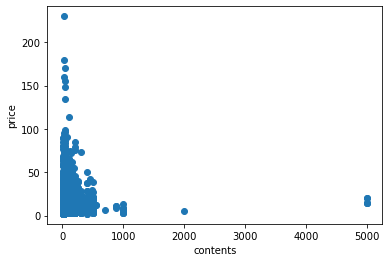

In [10]:
fig, ax = plt.subplots()
ax.scatter(skincare['contents'], skincare['price'])
ax.set_xlabel("contents")
ax.set_ylabel("price")
plt.show()
# Most products are under a kg, and the most expensive rpduct is ~230 pounds
# Most products are clustered around under a 100 pounds

(array([412., 306., 208.,  90.,  50.,  23.,  20.,  15.,   3.,   1.,   0.,
          1.,   1.,   2.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([  1.95  ,  13.3525,  24.755 ,  36.1575,  47.56  ,  58.9625,
         70.365 ,  81.7675,  93.17  , 104.5725, 115.975 , 127.3775,
        138.78  , 150.1825, 161.585 , 172.9875, 184.39  , 195.7925,
        207.195 , 218.5975, 230.    ]),
 <a list of 20 Patch objects>)

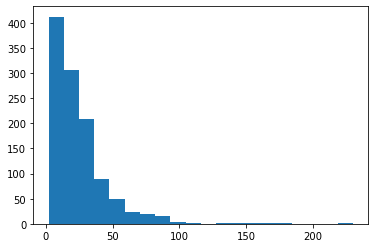

In [11]:
fig, ax = plt.subplots()
ax.hist(skincare['price'], bins=20)
# 400 products are in the price range 1-10 pounds

In [12]:
skincare['product_type'].unique() 
# These are all the unique values of product_type that will be one-hot-encoded

array(['Mist', 'Eye Care', 'Cleanser', 'Body Wash', 'Mask', 'Bath Salts',
       'Peel', 'Toner', 'Balm', 'Moisturiser', 'Bath Oil', 'Oil', 'Serum',
       'Exfoliator'], dtype=object)

In [15]:
print(skincare['price'].describe())
# Look at the inter-quartile range - 50% of data is below 18.90 pounds, and 50% is above

count    1135.000000
mean       23.963419
std        21.713618
min         1.950000
25%         9.950000
50%        18.900000
75%        31.250000
max       230.000000
Name: price, dtype: float64


In [16]:
skincare['price'] = skincare["price"].apply(lambda x: 1 if x > 18.90 else 0)
# convert the price to 1 for 'expensive' if over the 50 percentile, and to 0 for 'cheap' if under the 50 percentile
skincare['price'].value_counts()
# assign classes based on the data distribution

0    568
1    567
Name: price, dtype: int64

In [17]:
y = np.array(skincare['price'])
y.shape
# prepare labels
y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
X = skincare[['contents', 'product_type', 'ingredients']]
X
# include contents, product type, and ingredients but not brand

,contents,product_type,ingredients
0,100.0,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ..."
1,10.0,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm..."
2,15.0,Eye Care,"Aloe Babedensis Lead Juice, Water (Aqua), PEG ..."
3,200.0,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce..."
4,500.0,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen..."
...,...,...,...
1130,15.0,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,..."
1131,30.0,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy..."
1132,30.0,Serum,"Aqua (Water), Glycerin, Propanediol, Hydrolyze..."
1133,50.0,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce..."


In [19]:
# Start making a model with only content, ingredients, and the product type. No brand yet. 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, random_state=random_state, stratify=y)

In [20]:
X_train

,contents,product_type,ingredients
145,250.0,Mist,"Butane, Water, Alcohol, Isobutane, Propane, Di..."
1099,150.0,Body Wash,"Water (Aqua), Sesamum Indicum (Sesame) Seed Oi..."
168,150.0,Cleanser,"Aqua (Water), Cocamidopropyl betaine, Coco-glu..."
141,30.0,Serum,"Water\Aqua\Eau, Squalane, Glycerin, Butylene G..."
775,100.0,Exfoliator,"Water (Aqua), Ammonium Lauryl Sulfate, Cocamid..."
...,...,...,...
591,15.0,Eye Care,"Aqua / Water, Glycerin, Carbomer, Glycinesoja ..."
723,460.0,Bath Salts,"Himalayan Salts, Geranium, Sweet Blood Orange,..."
791,200.0,Toner,"Aqua (Water), Alcohol Denat., Aloe Barbadensis..."
208,14.0,Eye Care,"Purified Water, Niacinamide, Cetyl Alcohol, Ca..."


In [21]:
def tokenizer(x) -> list: 
    x = x.replace('(', '')
    x = x.replace(')', '')
    x = x.replace("\xa0", " ")
    x = x.replace(".", ",")
    x = x.replace(" & ", ", ")
    x = re.split(', ', x)
    return x

# make a custom tokenizer

In [22]:
tokenizer("(Hello.\xa0 & there!")
# it works on artefacts of the the dataset

['Hello', '', 'there!']

In [23]:
ohe = OneHotEncoder()
vect = CountVectorizer(tokenizer=lambda x: tokenizer(x))
scaler = StandardScaler()

In [24]:
string1= "(Hello), \xa0 & world!"
tokenizer(string1)

['Hello', ' ', 'world!']

In [25]:
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (scaler, ["contents"]), 
    remainder="passthrough")
# prepare the series of transformers with make_column_transformer


# w/out BRAND - BINARY - PERCEPTRON

In [26]:
from sklearn.linear_model import Perceptron
perc = Perceptron()
pr_pipe = make_pipeline(ct, perc)
# make a pipeline of the column transformers and the perceptron classifier

pr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                                  'ingredients'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['contents'])])),
                ('perceptron', Perceptron())])

In [27]:
perc_predictions = pr_pipe.predict(X_test)
# get the perceptron predictions

In [28]:
accuracy_score(y_test, perc_predictions)

0.7268722466960352

In [29]:
scores = cross_val_score(estimator=pr_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)
# get the cross-validation accuracy scores

[0.73913043 0.70588235 0.73529412 0.72058824 0.77941176 0.72058824
 0.76470588 0.70588235 0.73529412 0.67647059]


In [30]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# cross-validation accuracy scores will be reported in paper

Accuracy = 0.72832481 +/- 0.02821925


# w/out BRAND - BINARY - LOGISTIC REGRESSION

In [31]:
lr = LogisticRegression(random_state=random_state, max_iter = 10000)
lr_pipe = make_pipeline(ct, lr)
# prepare pipeline of column transformers and logistic regression

In [32]:
lr_pipe.fit(X_train, y_train)
# fit pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                                  'ingredients'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['contents'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=10000, random_state=1))])

In [33]:
lr_pipe.get_params()
# inspect parameters for optimization

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(),
                                    ['product_type']),
                                   ('countvectorizer',
                                    CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                    'ingredients'),
                                   ('standardscaler', StandardScaler(),
                                    ['contents'])])),
  ('logisticregression', LogisticRegression(max_iter=10000, random_state=1))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder', OneHotEncoder(),
                                  ['product_type']),
                                 ('countvectorizer',
                                  CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),

In [34]:
lr_predictions = lr_pipe.predict(X_test)
lr_predictions
# get the predictions

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [35]:
accuracy_score(y_test, lr_predictions)
# retrieve accuracy score

0.762114537444934

In [36]:
print(classification_report(y_test, lr_predictions))
# recall of cheap products is better than recall of expensive products

              precision    recall  f1-score   support

           0       0.73      0.82      0.78       227
           1       0.80      0.70      0.75       227

    accuracy                           0.76       454
   macro avg       0.77      0.76      0.76       454
weighted avg       0.77      0.76      0.76       454



In [37]:
confusion_matrix(y_test, lr_predictions)
# most samples are being classified correctly

array([[187,  40],
       [ 68, 159]], dtype=int64)

Gridsearch: 

In [38]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
tols = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Cs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# define a grid of potential parameters

param_grid = {'logisticregression__C': Cs, 'logisticregression__solver':solvers, 'logisticregression__tol':tols}
lr_pipe = make_pipeline(ct, lr)
lr_gs = RandomizedSearchCV(estimator=lr_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
lr_gs = lr_gs.fit(X_train, y_train)
lr_gs.best_params_

C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'logisticregression__tol': 1e-05,
 'logisticregression__solver': 'saga',
 'logisticregression__C': 10}

In [39]:
best_lr = lr_gs.best_estimator_   # refitting done automatically
best_lr.score(X_test, y_test)
# get the best estimator's accuracy score

0.73568281938326

In [40]:
scores = cross_val_score(estimator=best_lr, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.79710145 0.72058824 0.63235294 0.75       0.77941176 0.67647059
 0.82352941 0.75       0.69117647 0.67647059]


In [41]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# report the cross-validation accuracy score

Accuracy = 0.72971014 +/- 0.05775174


# w/out BRAND - BINARY - DECISION TREE

In [97]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=random_state, criterion='entropy')
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"), # do not include scaler for "contents" column - 
    # not necessary to scale numeric features with decision tree
    remainder="passthrough")
dt_pipe = make_pipeline(ct, dt)
# make and fit the pipeline with the column transformers
dt_pipe.fit(X_train, y_train)
dt_predictions = dt_pipe.predict(X_test)
accuracy_score(y_test, dt_predictions)

0.6519823788546255

In [98]:
dt_pipe.get_params()
# inspect parameters

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(),
                                    ['product_type']),
                                   ('countvectorizer',
                                    CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                    'ingredients')])),
  ('decisiontreeclassifier',
   DecisionTreeClassifier(criterion='entropy', random_state=1))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder', OneHotEncoder(),
                                  ['product_type']),
                                 ('countvectorizer',
                                  CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                  'ingredients')]),
 'decisiontreeclassifier': DecisionTreeClassifier(crit

In [99]:
print(classification_report(y_test, dt_predictions))
# recall of expensive products is higher than for cheap products
# low accuracy

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       227
           1       0.64      0.69      0.67       227

    accuracy                           0.65       454
   macro avg       0.65      0.65      0.65       454
weighted avg       0.65      0.65      0.65       454



In [100]:
confusion_matrix(y_test, dt_predictions)
# most samples still correctly classified, but most are not

array([[139,  88],
       [ 70, 157]], dtype=int64)

In [101]:
scores = cross_val_score(estimator=dt_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.72463768 0.61764706 0.52941176 0.67647059 0.64705882 0.70588235
 0.75       0.63235294 0.64705882 0.66176471]


In [102]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# report cross-validation scores

Accuracy = 0.65922847 +/- 0.05882009


In [103]:
criterions = ['gini', 'entropy']
max_depths = [None, 10, 100, 1000, 10000]
param_grid = {'decisiontreeclassifier__min_samples_leaf': np.arange(1,50), 
              'decisiontreeclassifier__max_depth': max_depths, 
              'decisiontreeclassifier__criterion':criterions}
# define hyperparameter grid and optimize hyperparameters

dt_gs = RandomizedSearchCV(estimator=dt_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
dt_gs = dt_gs.fit(X_train, y_train)
print(dt_gs.best_params_)
best_dt = dt_gs.best_estimator_   # refitting done automatically
print(best_dt.score(X_test, y_test))

{'decisiontreeclassifier__min_samples_leaf': 31, 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'entropy'}
0.7070484581497798


In [104]:
scores = cross_val_score(estimator=best_dt, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.75362319 0.67647059 0.72058824 0.76470588 0.69117647 0.69117647
 0.80882353 0.76470588 0.64705882 0.61764706]


In [105]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

Accuracy = 0.71359761 +/- 0.05653384


# w/out BRAND - BINARY - KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=5)
# instantiate a knn classifier

ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"), 
    remainder="passthrough")

In [107]:
knn_pipe = make_pipeline(ct, knn)
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_test)
accuracy_score(y_test, knn_predictions)

0.6519823788546255

In [108]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(),
                                    ['product_type']),
                                   ('countvectorizer',
                                    CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                    'ingredients')])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder', OneHotEncoder(),
                                  ['product_type']),
                                 ('countvectorizer',
                                  CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                  'ingredients')]),
 'kneighborsclassifier': KNeighborsClassifier(),
 'columntransformer__n_jobs': None,
 'columntra

In [54]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.61      0.82      0.70       227
           1       0.73      0.48      0.58       227

    accuracy                           0.65       454
   macro avg       0.67      0.65      0.64       454
weighted avg       0.67      0.65      0.64       454



In [109]:
knn_pipe = make_pipeline(ct, knn)
param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1,50), 
              'kneighborsclassifier__weights':['uniform', 'distance']}

knn_gs = RandomizedSearchCV(estimator=knn_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
knn_gs = knn_gs.fit(X_train, y_train)
print(knn_gs.best_params_)
best_knn = knn_gs.best_estimator_   # refitting done automatically
print(best_knn.score(X_test, y_test))

{'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 39}
0.6497797356828194


In [110]:
scores = cross_val_score(estimator=best_knn, X=X_train, y=y_train, cv=10, n_jobs=-1)
# do cross validation on best knn model
print(scores)

[0.71014493 0.63235294 0.64705882 0.72058824 0.70588235 0.67647059
 0.69117647 0.67647059 0.66176471 0.55882353]


In [111]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

Accuracy = 0.66807332 +/- 0.04508327


# w/out BRAND - BINARY - SVM

In [58]:
from sklearn.svm import SVC

In [59]:
svm = SVC(kernel='linear', random_state = random_state)

In [60]:
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (scaler, ["contents"]), # add scaler back
    remainder="passthrough")
# make sure contents are scaled again

In [61]:
svm_pipe = make_pipeline(ct, svm)
svm_pipe.fit(X_train, y_train)
svm_predictions = svm_pipe.predict(X_test)
accuracy_score(y_test, svm_predictions)

0.7070484581497798

In [62]:
print(classification_report(y_test, svm_predictions))
# recall is higher for the cheap class, but expensive class classifications more precise

              precision    recall  f1-score   support

           0       0.69      0.77      0.72       227
           1       0.73      0.65      0.69       227

    accuracy                           0.71       454
   macro avg       0.71      0.71      0.71       454
weighted avg       0.71      0.71      0.71       454



In [63]:
confusion_matrix(y_test, svm_predictions)
# most samples correctly classified

array([[174,  53],
       [ 80, 147]], dtype=int64)

Gridsearch: 

In [64]:
svm = SVC(kernel='linear', random_state = random_state)
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (scaler, ["contents"]), 
    remainder="passthrough")
svm_pipe = make_pipeline(ct, svm)

param_grid = [{'svc__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
               'svc__kernel': ['linear']},
              {'svc__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
               'svc__gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
               'svc__kernel': ['rbf']}]
# define a hyperparameter grid to optimize
svm_gs = RandomizedSearchCV(estimator=svm_pipe, random_state = random_state, param_distributions=param_grid, scoring='accuracy', cv=10, refit=True)
svm_gs = svm_gs.fit(X_train, y_train)
print(svm_gs.best_params_)
# inspect the best parameters
best_svm = svm_gs.best_estimator_   # refitting done automatically
print(best_svm.score(X_test, y_test))

{'svc__kernel': 'rbf', 'svc__gamma': 0.0001, 'svc__C': 100}
0.7202643171806168


In [65]:
scores = cross_val_score(estimator=best_svm, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.79710145 0.67647059 0.66176471 0.70588235 0.76470588 0.70588235
 0.85294118 0.72058824 0.73529412 0.75      ]


In [66]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

Accuracy = 0.73706309 +/- 0.05433613


# w/out BRAND - BINARY - VOTING CLASSIFIER

In [68]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(tol=1, solver='newton-cg', C=19, random_state=random_state, max_iter = 10000)
knn = KNN()
svm = SVC(kernel='rbf', gamma=0.01, C=10.0, random_state=random_state)
classifiers = [("Logistic Regression", lr),
              ("Perceptron", perc),
              ("Support Vector Classifier", svm)]
vc = VotingClassifier(estimators = classifiers)
# define a voting classifier with the best-performing models so far: perceptron, logistic regression, and SVC

In [69]:
vc_pipe = make_pipeline(ct, vc)
# prepare pipeline

In [70]:
vc_pipe.get_params()
# inspect parameters

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(),
                                    ['product_type']),
                                   ('countvectorizer',
                                    CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                    'ingredients'),
                                   ('standardscaler', StandardScaler(),
                                    ['contents'])])),
  ('votingclassifier',
   VotingClassifier(estimators=[('Logistic Regression',
                                 LogisticRegression(C=19, max_iter=10000,
                                                    random_state=1,
                                                    solver='newton-cg', tol=1)),
                                ('Perceptron', Perceptron()),
                                ('Support Vector Classifier',
              

In [71]:
vc_pipe.fit(X_train, y_train)
# fit pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                                  'ingredients'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['contents'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('Logistic Regression',
                                               LogisticRegression(C=19,
                                                             

In [72]:
vc_pred = vc_pipe.predict(X_test)
accuracy_score(y_test, vc_pred)
# find the accuracy score

0.7466960352422908

In [73]:
scores = cross_val_score(estimator=vc_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.7826087  0.73529412 0.66176471 0.73529412 0.79411765 0.69117647
 0.88235294 0.79411765 0.70588235 0.69117647]


In [74]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# report cross validation accuracy

Accuracy = 0.74737852 +/- 0.06284060


# w/out BRAND - BINARY - BAGGING

In [75]:
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(min_samples_leaf=31,
                            max_depth=10, 
                            criterion='entropy',
                            random_state = random_state)

bc = BaggingClassifier(base_estimator = dt, 
                       n_estimators = 300, 
                       n_jobs = -1, 
                       random_state=random_state)
# ensemble formed by models that use the same training algorithm
# models not trained on entire dataset
# each model trained on different subset of the data
# stands for "bootstrap aggregation"
# reduces variance of individual models in ensemble
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"), # don't need to scale the contents column because we are using a decision tree bagging classifier
    remainder="passthrough")


bc_pipe = make_pipeline(ct, bc)

In [76]:
bc_pipe.get_params()
# inpsect the parameters

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(),
                                    ['product_type']),
                                   ('countvectorizer',
                                    CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                    'ingredients')])),
  ('baggingclassifier',
   BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                           max_depth=10,
                                                           min_samples_leaf=31,
                                                           random_state=1),
                     n_estimators=300, n_jobs=-1, random_state=1))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder', OneHotEncoder(),
         

In [77]:
bc_pipe.fit(X_train, y_train)
# fit the pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                                  'ingredients')])),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                         max_depth=10,
                                                                         min_samples_leaf=31,
                                                                         random_state=1),
                                   n_e

In [78]:
bc_pred = bc_pipe.predict(X_test)
# get pipeline's predictions

In [79]:
accuracy_score(y_test, bc_pred)

0.6960352422907489

In [80]:
# use a for loop to get the optimal number of estimators

accs = []
n_estimators_range = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for n_estimators in n_estimators_range: 
    bc = BaggingClassifier(base_estimator = dt, random_state=random_state, n_estimators = n_estimators, n_jobs = -1)
    ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"), 
    remainder="passthrough")
    bc_pipe = make_pipeline(ct, bc)
    bc_pipe.fit(X_train, y_train)
    bc_pred = bc_pipe.predict(X_test)
    acc = accuracy_score(y_test, bc_pred)
    accs.append(acc)
    print(n_estimators, "Done with this number of estimators")

100 Done with this number of estimators
200 Done with this number of estimators
300 Done with this number of estimators
400 Done with this number of estimators
500 Done with this number of estimators
600 Done with this number of estimators
700 Done with this number of estimators
800 Done with this number of estimators
900 Done with this number of estimators
1000 Done with this number of estimators


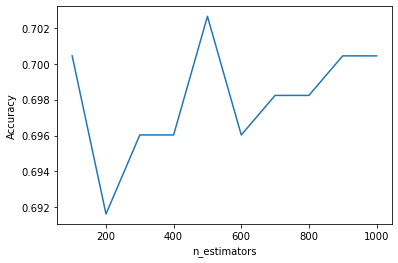

In [81]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(n_estimators_range, accs)
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.show()
# there seems to be a spike at 500 estimators

In [82]:
# refit the bagging classifier on 500 estimators
bc = BaggingClassifier(base_estimator = dt, 
                       n_estimators = 500, 
                       n_jobs = -1, 
                       random_state=random_state)
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"), 
    remainder="passthrough")
bc_pipe = make_pipeline(ct, bc)
bc_pipe.fit(X_train, y_train)
bc_pred = bc_pipe.predict(X_test)
print(accuracy_score(y_test, bc_pred))
scores = cross_val_score(estimator=bc_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# accuracy not much better than before

0.7026431718061674
[0.75362319 0.64705882 0.67647059 0.77941176 0.67647059 0.70588235
 0.82352941 0.72058824 0.67647059 0.60294118]
Accuracy = 0.70624467 +/- 0.06196272


# w/out BRAND - BINARY - RANDOM FORESTS

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = random_state)
# ensemble method that uses decision tree as base estimator
# each estimator trained on different bootstrap having same size as training set
# only d features can be sampled at each node without replacement 
# predictions on new instances collected by random forests meta classifier and final prediction is made 
# final prediction done with majority voting

rf_pipe = make_pipeline(ct, rf)
# fit the random forests pipeline
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(),
                                    ['product_type']),
                                   ('countvectorizer',
                                    CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                    'ingredients')])),
  ('randomforestclassifier',
   RandomForestClassifier(n_estimators=1000, random_state=1))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder', OneHotEncoder(),
                                  ['product_type']),
                                 ('countvectorizer',
                                  CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                  'ingredients')]),
 'randomforestclassifier': RandomForestClassifier(n_esti

In [85]:
rf_pipe.fit(X_train, y_train)
# fit pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000001CEB7E7A940>),
                                                  'ingredients')])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=1000, random_state=1))])

In [86]:
rf_pred = rf_pipe.predict(X_test)
# get predictions

In [87]:
accuracy_score(y_test, rf_pred)

0.7599118942731278

In [88]:
criterions = ['gini', 'entropy']
max_depths = [None, 10, 100, 1000, 10000]
param_grid = {'randomforestclassifier__min_samples_leaf': np.arange(1,50), 
              'randomforestclassifier__max_depth': max_depths, 
              'randomforestclassifier__criterion':criterions}
# define hyperparameter grid
# do randomized search with hyperparameters
rf = RandomForestClassifier(n_estimators = 1000, random_state = random_state)
rf_pipe = make_pipeline(ct, rf)

rf_gs = RandomizedSearchCV(estimator=rf_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
rf_gs = rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
best_rf = rf_gs.best_estimator_   # refitting done automatically
print(best_rf.score(X_test, y_test))

{'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_depth': 10000, 'randomforestclassifier__criterion': 'gini'}
0.748898678414097


In [89]:
scores = cross_val_score(estimator=best_rf, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# highest accuracy out of the classifiers

[0.82608696 0.72058824 0.66176471 0.82352941 0.76470588 0.77941176
 0.83823529 0.76470588 0.79411765 0.75      ]
Accuracy = 0.77231458 +/- 0.05088843
